<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">Grad-CAM
</div></center></h1>
<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">Alireza Akhavanpour (class.vision)</div></center>
<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"><a href="https://www.aparat.com/v/kHhOB">Video tutorial(aparat)</a></div></center>


In [35]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
model = VGG16(weights='./models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [37]:
def preprocess(img):
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img

In [38]:
img_path = './images/DOG.jpg'
img = image.load_img(img_path, target_size=(224, 224))
image_1 = preprocess(img)

In [39]:
predict = model.predict(image_1)
print(decode_predictions(predict,top=3))
target_class = np.argmax(predict[0])
print("Target Class = %d" % target_class)

[[('n02099601', 'golden_retriever', 0.14805865), ('n02091831', 'Saluki', 0.10429215), ('n02106030', 'collie', 0.088780895)]]
Target Class = 207


In [40]:
last_conv = model.get_layer('block5_conv3')
grads = K.gradients(model.output[:,207],last_conv.output)[0]

In [41]:
pooled_grads = K.mean(grads,axis=(0,1,2))
iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
pooled_grads_value,conv_layer_output = iterate([image_1])

In [42]:
for i in range(512):
    conv_layer_output[:,:,i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output,axis=-1)

In [43]:
for x in range(heatmap.shape[0]):
    for y in range(heatmap.shape[1]):
        heatmap[x,y] = np.max(heatmap[x,y],0)

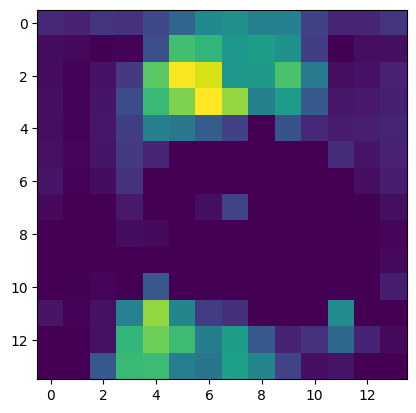

In [44]:
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)

In [45]:
upsample = resize(heatmap, (224,224),preserve_range=True)

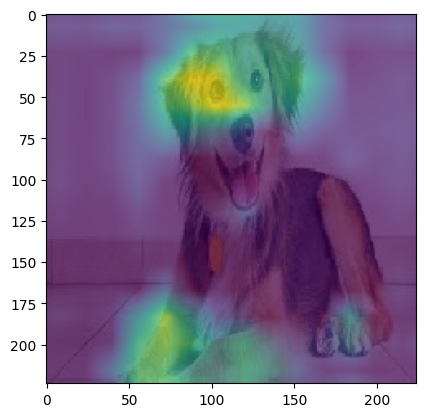

In [46]:
plt.imshow(img)
plt.imshow(upsample,alpha=0.7)
plt.show()

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   یادگیری عمیق<br>علیرضا اخوان پور<br><br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>